<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/weatherDataLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import pandas as pd

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')

# https://drive.google.com/file/d/1A7RNorqSglE-G8j5BacVsGYmE6eR4cwx/view?usp=sharing
1HuFa4lq8WF2L24P5T1mLkpOpYEnVtP2W
1ApRYxyMqnFKH8XW1GbQ

1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1A7RNorqSglE-G8j5BacVsGYmE6eR4cwx'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ghcnd-stations.csv')

1A7RNorqSglE-G8j5BacVsGYmE6eR4cwx


In [0]:
#Api to fetch the records

# response = requests.get("https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&startdate=2017-01-01&enddate=2017-01-31&locationid=FIPS:23&format=csv", headers={'token': 'RGFmBkMzqCUgFXbiQWeqalQIAAoBMhTQ'})
# response = requests.get("https://www.ncdc.noaa.gov/cdo-web/api/v2/locationcategories", headers={'token': 'RGFmBkMzqCUgFXbiQWeqalQIAAoBMhTQ'})

# response.content

In [0]:
# responseObject=response.json()

In [0]:
# df=pd.DataFrame.from_dict(responseObject['results'])

In [0]:
# df
files = [str(x)+'.csv.gz' for x in range(2010,2011)]
files

['2010.csv.gz']

In [0]:
#fetching data from ftp server for years from 1993 to 2000

from ftplib import FTP
from datetime import datetime

start = datetime.now()
ftp = FTP('ftp.ncdc.noaa.gov')
ftp.login()
ftp.cwd("pub/data/ghcn/daily/by_year/")


# Get All Files
files = [str(x)+'.csv.gz' for x in range(2010,2011)]

# Print out the files
for file in files:
	print("Downloading..." + file)
	ftp.retrbinary("RETR " + file ,open(file, 'wb').write)

ftp.close()

end = datetime.now()
diff = end - start
print('All files downloaded for ' + str(diff.seconds) + 's')

Downloading...2010.csv.gz
All files downloaded for 38s


In [0]:
# df = pd.read_csv('1987.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)

In [0]:
# df

In [0]:
#getting ready with sparkx instance

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
!pip install pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark import SparkFiles
import pyspark.sql.functions as func

     |████████████████████████████████| 217.8MB 62kB/s 
     |████████████████████████████████| 204kB 55.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=13db841a2ac46ac0253f8d7f7d6083902e13cd9b1a800f36b262f4d7fbcca50e
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
#generating spark contect and sessions to consume our datasets

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("gfcj") \
        .getOrCreate()

In [0]:
#adding all the files to spark context to spread them into rdd and perform faster exexution on huge dataset

In [0]:
sc =SparkContext.getOrCreate()

for file in files:
  sc.addFile(file)

In [0]:
sqlContext = SQLContext(sc)
sqlContext
# df = sqlContext.read.csv(SparkFiles.get(files), header=True, inferSchema= True)
# df.printSchema()

spark.read.format("csv").option("header", "true").load("*.csv.gz")
df=spark.read.option("header", "false").csv("*.csv.gz")

In [0]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)



In [0]:
df.show(5)

+-----------+--------+----+----+----+----+---+----+
|        _c0|     _c1| _c2| _c3| _c4| _c5|_c6| _c7|
+-----------+--------+----+----+----+----+---+----+
|CA002303986|20100101|TMAX| 205|null|   G|  C|null|
|CA002303986|20100101|TMIN|-300|null|null|  C|null|
|CA002303986|20100101|PRCP|   4|null|null|  C|null|
|CA002303986|20100101|SNOW|   4|null|null|  C|null|
|CA002303986|20100101|SNWD|   0|null|   I|  C|null|
+-----------+--------+----+----+----+----+---+----+
only showing top 5 rows



In [0]:
sc.addFile('ghcnd-stations.csv')

In [0]:
df2=spark.read.option("header", "true").csv('ghcnd-stations.csv')

In [0]:
df2

DataFrame[id: string, lat: string, long: string, _c3: string, _c4: string, _c5: string]

In [0]:
df.show(5)

+-----------+--------+----+----+----+----+---+----+
|        _c0|     _c1| _c2| _c3| _c4| _c5|_c6| _c7|
+-----------+--------+----+----+----+----+---+----+
|CA002303986|20100101|TMAX| 205|null|   G|  C|null|
|CA002303986|20100101|TMIN|-300|null|null|  C|null|
|CA002303986|20100101|PRCP|   4|null|null|  C|null|
|CA002303986|20100101|SNOW|   4|null|null|  C|null|
|CA002303986|20100101|SNWD|   0|null|   I|  C|null|
+-----------+--------+----+----+----+----+---+----+
only showing top 5 rows



In [0]:
df2.show(5)

+-----------+-------+--------+----+----+----+
|         id|    lat|    long| _c3| _c4| _c5|
+-----------+-------+--------+----+----+----+
|ACW00011604|17.1167|-61.7833|null|null|null|
|ACW00011647|17.1333|-61.7833|null|null|null|
|AE000041196| 25.333|  55.517|null|null|null|
|AEM00041194| 25.255|  55.364|null|null|null|
|AEM00041217| 24.433|  54.651|null|null|null|
+-----------+-------+--------+----+----+----+
only showing top 5 rows



In [0]:
data=df.selectExpr('_c0 as id','_c1 as date','_c2 as type','_c3 as value')

In [0]:
data.show()

+-----------+--------+----+-----+
|         id|    date|type|value|
+-----------+--------+----+-----+
|CA002303986|20100101|TMAX|  205|
|CA002303986|20100101|TMIN| -300|
|CA002303986|20100101|PRCP|    4|
|CA002303986|20100101|SNOW|    4|
|CA002303986|20100101|SNWD|    0|
|US1FLSL0019|20100101|PRCP|    0|
|ASN00037003|20100101|PRCP|    0|
|US1AZMR0019|20100101|PRCP|    0|
|US1AZMR0019|20100101|SNOW|    0|
|USC00178998|20100101|TMAX|    0|
|USC00178998|20100101|TMIN|  -56|
|USC00178998|20100101|TOBS|  -56|
|USC00178998|20100101|PRCP|   43|
|USC00178998|20100101|SNOW|   46|
|USC00178998|20100101|SNWD|  102|
|USC00242347|20100101|TMAX|   33|
|USC00242347|20100101|TMIN| -161|
|USC00242347|20100101|TOBS|   28|
|USC00242347|20100101|PRCP|    0|
|NOE00133566|20100101|TMAX|    2|
+-----------+--------+----+-----+
only showing top 20 rows



In [0]:
df2.show(2)

+-----------+-------+--------+----+----+----+
|         id|    lat|    long| _c3| _c4| _c5|
+-----------+-------+--------+----+----+----+
|ACW00011604|17.1167|-61.7833|null|null|null|
|ACW00011647|17.1333|-61.7833|null|null|null|
+-----------+-------+--------+----+----+----+
only showing top 2 rows



In [0]:
final_df = data.join(df2, on=['id'], how='inner')

In [0]:
final_df=final_df.selectExpr('id','lat as LATITUDE','long as LONGITUDE','date','type','value')

In [0]:
final_df.registerTempTable("temperature")

In [0]:
# def spark_shape(self):
#     return (self.count(), len(self.columns))
# pyspark.sql.dataframe.DataFrame.shape = spark_shape

In [0]:
# final_df.shape()

In [0]:
# df.shape()

In [0]:
fire=pd.read_csv('Fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df=fire

df['disc_clean_date'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
#Convert containment date from julian to standard date
df['cont_clean_date'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Day of month string
df['discovery_month'] = df['disc_clean_date'].dt.strftime('%b')
#Returns the weekday string
df['discovery_weekday'] = df['disc_clean_date'].dt.strftime('%a')
#Merge discovery date and time 


In [0]:
df

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,disc_clean_date,cont_clean_date,discovery_month,discovery_weekday
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02,Feb,Wed
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12,May,Wed
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31,May,Mon
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-06-28,2004-07-03,Jun,Mon
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-06-28,2004-07-03,Jun,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,NaN,ODESSA 2,NaN,NaN,NaN,NaN,NaN,2015,2457291.5,269,1726.0,13.0,Missing/Undefined,2457291.5,269.0,1843.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...,2015-09-26,2015-09-26,Sep,Sat
1880461,1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457300.5,278,126.0,9.0,Miscellaneous,NaN,NaN,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,2015-10-05,NaT,Oct,Mon
1880462,1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457144.5,122,2052.0,13.0,Missing/Undefined,NaN,NaN,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,2015-05-02,NaT,May,Sat
1880463,1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457309.5,287,2309.0,13.0,Missing/Undefined,NaN,NaN,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...,2015-10-14,Na

In [0]:
fire_filter=[2010]
df_2010=df[df.FIRE_YEAR.isin(fire_filter)]

fire_filter

[2010]

In [0]:
df_2010=df_2010[['LATITUDE','LONGITUDE','cont_clean_date']]

In [0]:
# df_2010=df_2010.round()
df_2010=df_2010.dropna()

In [0]:
df_2010

,LATITUDE,LONGITUDE,cont_clean_date
1145148,62.332779,-145.358063,2010-08-25
1145149,61.007221,-149.686951,2010-06-04
1145150,62.789166,-141.310837,2010-06-10
1145151,64.790001,-147.689728,2010-04-24
1145152,64.791946,-147.689163,2010-04-25
...,...,...,...
1880370,41.508867,-120.819167,2010-07-27
1880390,38.205574,-120.898979,2010-06-11
1880393,41.530567,-120.523647,2010-08-04
1880417,38.031985,-120.405563,2010-09-15


In [0]:
# type(df_1993['cont_clean_date'])

In [0]:
df_2010['cont_clean_date']=df_2010['cont_clean_date'].astype(str)

In [0]:
df_2010['date']=df_2010['cont_clean_date'].replace('-', '', regex=True).astype(int)

In [0]:
df_2010

,LATITUDE,LONGITUDE,cont_clean_date,date
1145148,62.332779,-145.358063,2010-08-25,20100825
1145149,61.007221,-149.686951,2010-06-04,20100604
1145150,62.789166,-141.310837,2010-06-10,20100610
1145151,64.790001,-147.689728,2010-04-24,20100424
1145152,64.791946,-147.689163,2010-04-25,20100425
...,...,...,...,...
1880370,41.508867,-120.819167,2010-07-27,20100727
1880390,38.205574,-120.898979,2010-06-11,20100611
1880393,41.530567,-120.523647,2010-08-04,20100804
1880417,38.031985,-120.405563,2010-09-15,20100915


In [0]:
df_2010=df_2010[['LATITUDE','LONGITUDE','date']]

In [0]:
df_2010.to_csv(r'fire_2010.csv')

In [0]:
sc.addFile('fire_2010.csv')

In [0]:
fire=spark.read.option("header", "true").csv('fire_2010.csv')

In [0]:
fire.show(5)

+-------+------------------+-------------------+--------+
|    _c0|          LATITUDE|          LONGITUDE|    date|
+-------+------------------+-------------------+--------+
|1145148|        62.3327789|-145.35806269999998|20100825|
|1145149|61.007221200000004|       -149.6869507|20100604|
|1145150|        62.7891655|       -141.3108368|20100610|
|1145151|        64.7900009|       -147.6897278|20100424|
|1145152|        64.7919464|       -147.6891632|20100425|
+-------+------------------+-------------------+--------+
only showing top 5 rows



In [0]:
fire=fire.withColumn("LATITUDE", func.round(fire["LATITUDE"]))
fire=fire.withColumn("LONGITUDE", func.round(fire["LONGITUDE"]))

In [0]:
final_df.show()

+-----------+--------+---------+--------+----+-----+
|         id|LATITUDE|LONGITUDE|    date|type|value|
+-----------+--------+---------+--------+----+-----+
|CA002303986|    62.0|    -93.0|20100101|TMAX|  205|
|CA002303986|    62.0|    -93.0|20100101|TMIN| -300|
|CA002303986|    62.0|    -93.0|20100101|PRCP|    4|
|CA002303986|    62.0|    -93.0|20100101|SNOW|    4|
|CA002303986|    62.0|    -93.0|20100101|SNWD|    0|
|US1FLSL0019|    27.0|    -80.0|20100101|PRCP|    0|
|ASN00037003|   -20.0|    138.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|SNOW|    0|
|USC00178998|    45.0|    -68.0|20100101|TMAX|    0|
|USC00178998|    45.0|    -68.0|20100101|TMIN|  -56|
|USC00178998|    45.0|    -68.0|20100101|TOBS|  -56|
|USC00178998|    45.0|    -68.0|20100101|PRCP|   43|
|USC00178998|    45.0|    -68.0|20100101|SNOW|   46|
|USC00178998|    45.0|    -68.0|20100101|SNWD|  102|
|USC00242347|    47.0|   -110.0|20100101|TMAX|

In [0]:
final_df=final_df.withColumn("LATITUDE", func.round(final_df["LATITUDE"]))
final_df=final_df.withColumn("LONGITUDE", func.round(final_df["LONGITUDE"]))

In [0]:
final_df.show()

+-----------+--------+---------+--------+----+-----+
|         id|LATITUDE|LONGITUDE|    date|type|value|
+-----------+--------+---------+--------+----+-----+
|CA002303986|    62.0|    -93.0|20100101|TMAX|  205|
|CA002303986|    62.0|    -93.0|20100101|TMIN| -300|
|CA002303986|    62.0|    -93.0|20100101|PRCP|    4|
|CA002303986|    62.0|    -93.0|20100101|SNOW|    4|
|CA002303986|    62.0|    -93.0|20100101|SNWD|    0|
|US1FLSL0019|    27.0|    -80.0|20100101|PRCP|    0|
|ASN00037003|   -20.0|    138.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|PRCP|    0|
|US1AZMR0019|    34.0|   -112.0|20100101|SNOW|    0|
|USC00178998|    45.0|    -68.0|20100101|TMAX|    0|
|USC00178998|    45.0|    -68.0|20100101|TMIN|  -56|
|USC00178998|    45.0|    -68.0|20100101|TOBS|  -56|
|USC00178998|    45.0|    -68.0|20100101|PRCP|   43|
|USC00178998|    45.0|    -68.0|20100101|SNOW|   46|
|USC00178998|    45.0|    -68.0|20100101|SNWD|  102|
|USC00242347|    47.0|   -110.0|20100101|TMAX|

In [0]:
complete = fire.join(final_df, on=['LATITUDE','LONGITUDE','date'], how='inner')

In [0]:
complete.show(1)

+--------+---------+--------+-------+-----------+----+-----+
|LATITUDE|LONGITUDE|    date|    _c0|         id|type|value|
+--------+---------+--------+-------+-----------+----+-----+
|    34.0|   -117.0|20100101|1176703|USC00045860|TMAX|  122|
+--------+---------+--------+-------+-----------+----+-----+
only showing top 1 row



In [0]:
completepandas_df = complete.toPandas()

In [0]:
completepandas_df.shape

(3440655, 7)

In [0]:
completepandas_df.head

<bound method NDFrame.head of          LATITUDE  LONGITUDE      date      _c0           id  type value
0            34.0     -117.0  20100101  1176703  USC00045860  TMAX   122
1            34.0     -117.0  20100101  1176703  USC00045860  TMIN    33
2            34.0     -117.0  20100101  1176703  USC00045860  TOBS    39
3            34.0     -117.0  20100101  1176703  USC00045860  PRCP     0
4            34.0     -117.0  20100101  1176703  USC00045860  SNOW     0
...           ...        ...       ...      ...          ...   ...   ...
3440650      34.0      -87.0  20101231  1365830  US1ALWN0001  PRCP     0
3440651      34.0      -87.0  20101231  1365830  US1ALWN0001  SNOW     0
3440652      34.0      -87.0  20101231  1365830  USR0000ABAN  TMAX   194
3440653      34.0      -87.0  20101231  1365830  USR0000ABAN  TMIN   106
3440654      34.0      -87.0  20101231  1365830  USR0000ABAN  TAVG   149

[3440655 rows x 7 columns]>

In [0]:
completepandas_df.to_csv(r'2010final.csv')

In [0]:
completepandas_df=pd.read_csv('2010final.csv')

In [0]:
completepandas_df=completepandas_df[['LATITUDE','LONGITUDE','date','type','value']]

In [0]:
temp=completepandas_df[completepandas_df.type=='TMAX']

In [0]:
temp=temp.groupby(by=['LATITUDE','LONGITUDE','date']).mean().reset_index()

In [0]:
fire=pd.read_csv('Fire.csv')
df=fire

df['disc_clean_date'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
#Convert containment date from julian to standard date
df['cont_clean_date'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Day of month string
df['discovery_month'] = df['disc_clean_date'].dt.strftime('%b')
#Returns the weekday string
df['discovery_weekday'] = df['disc_clean_date'].dt.strftime('%a')
df['cont_clean_date']=df['cont_clean_date'].astype(str)
df=df[df.cont_clean_date!='NaT']
df['date']=df['cont_clean_date'].replace('-', '', regex=True).astype(int)
df=df[['LATITUDE','LONGITUDE','STAT_CAUSE_CODE','DISCOVERY_DOY','date','FIRE_SIZE']]
fire=df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
fire['LATITUDE']=fire['LATITUDE'].round()
fire['LONGITUDE']=fire['LONGITUDE'].round()


In [0]:
finalFinal = pd.merge(temp, fire, on=['LATITUDE','LONGITUDE','date'], how='inner')

In [0]:
finalFinal

,LATITUDE,LONGITUDE,date,value,STAT_CAUSE_CODE,DISCOVERY_DOY,FIRE_SIZE
0,19.0,-155.0,20100306,200.000000,7.0,63,0.1
1,19.0,-155.0,20100425,233.666667,5.0,111,100.0
2,19.0,-155.0,20100609,239.000000,2.0,160,0.1
3,19.0,-155.0,20100712,194.666667,4.0,193,0.1
4,19.0,-155.0,20101019,248.500000,1.0,292,0.1
...,...,...,...,...,...,...,...
33606,68.0,-159.0,20100712,156.000000,1.0,183,9890.0
33607,68.0,-159.0,20100726,161.000000,1.0,185,6538.0
33608,68.0,-148.0,20100617,172.000000,1.0,165,5.0
33609,68.0,-144.0,20100621,144.000000,1.0,168,3.0


In [0]:
finalFinal.to_csv(r'finalFinal.csv')

In [0]:
# X = finalFinal[['LATITUDE','LONGITUDE','STAT_CAUSE_CODE','DISCOVERY_DOY','value','date']].values.reshape(-1,6)
X = finalFinal[['value']].values.reshape(-1,1)

In [0]:
X

array([[200.        ],
       [233.66666667],
       [239.        ],
       ...,
       [172.        ],
       [144.        ],
       [183.        ]])

In [0]:
Y = finalFinal[['FIRE_SIZE']].values.reshape(-1,1)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
# X = sc.fit_transform(X)
# Y = sc.fit_transform(Y)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
regressor = LinearRegression().fit(X_train,Y_train)

In [0]:
regressor.coef_

array([[-0.25988461]])

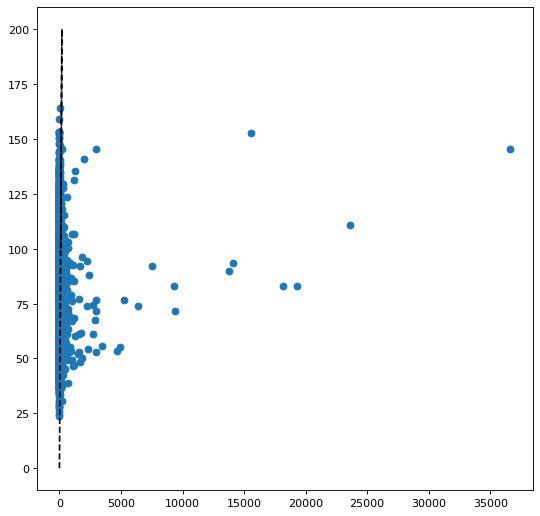

In [0]:
pred = regressor.predict(X_test)
# plt.scatter(Y_test,pred,marker='.',c='b')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Y_test,pred)
plt.plot([0,200,100],[0,200,100],c='k',linestyle='--')

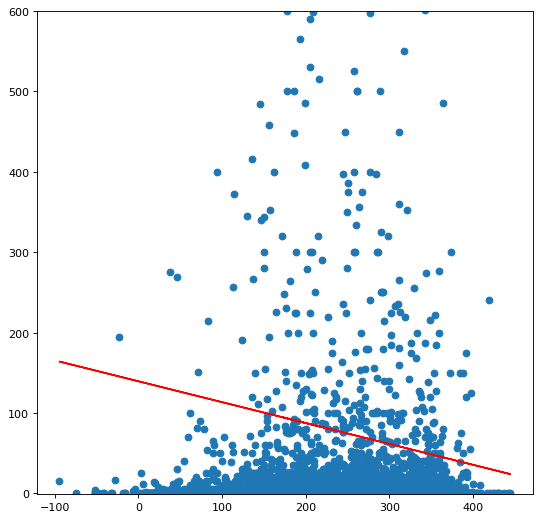

In [0]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_test, Y_test)
# plt.xlim(-1, 1)
plt.ylim(-1, 600)
plt.plot(X_test, pred, color='red')
plt.show()

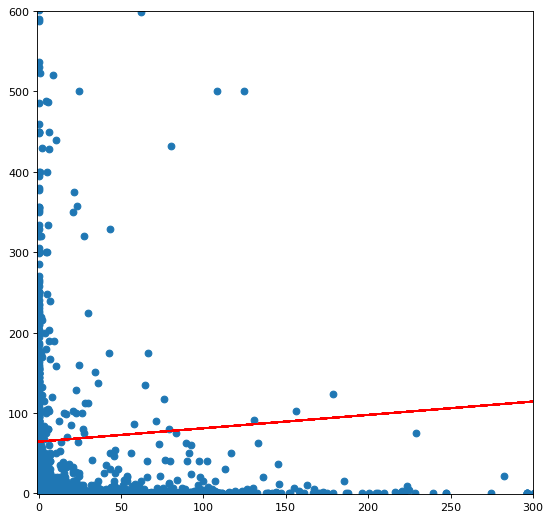

In [0]:
temp=completepandas_df[completepandas_df.type=='PRCP']
temp=temp.dropna()
temp=temp.groupby(by=['LATITUDE','LONGITUDE','date']).mean().reset_index()
finalFinal = pd.merge(temp, fire, on=['LATITUDE','LONGITUDE','date'], how='inner')
X = finalFinal[['value']].values.reshape(-1,1)
Y = finalFinal[['FIRE_SIZE']].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
regressor = LinearRegression().fit(X_train,Y_train)
pred = regressor.predict(X_test)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_test, Y_test)
plt.xlim(-1, 300)
plt.ylim(-1, 600)
plt.plot(X_test, pred, color='red')
plt.show()

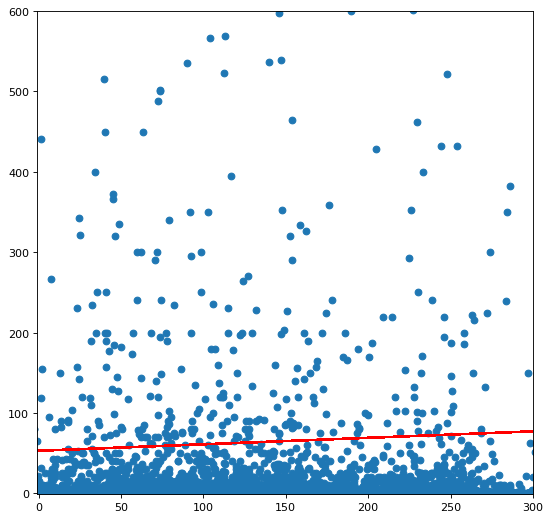

In [0]:
temp=completepandas_df[completepandas_df.type=='TOBS']
temp=temp.dropna()
temp=temp.groupby(by=['LATITUDE','LONGITUDE','date']).mean().reset_index()
finalFinal = pd.merge(temp, fire, on=['LATITUDE','LONGITUDE','date'], how='inner')
X = finalFinal[['value']].values.reshape(-1,1)
Y = finalFinal[['FIRE_SIZE']].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
regressor = LinearRegression().fit(X_train,Y_train)
pred = regressor.predict(X_test)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_test, Y_test)
plt.xlim(-1, 300)
plt.ylim(-1, 600)
plt.plot(X_test, pred, color='red')
plt.show()

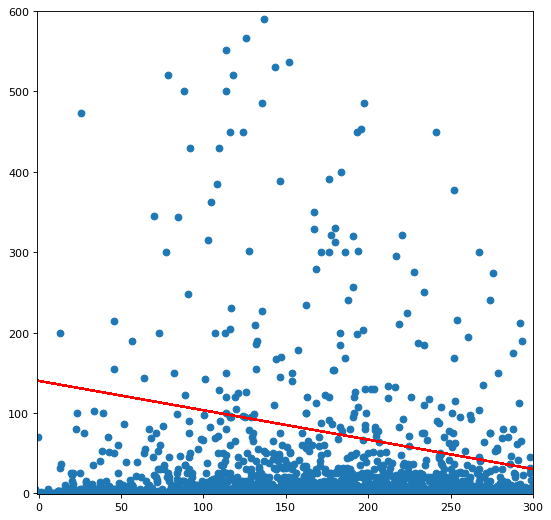

In [0]:
temp=completepandas_df[completepandas_df.type=='TAVG']
temp=temp.dropna()
temp=temp.groupby(by=['LATITUDE','LONGITUDE','date']).mean().reset_index()
finalFinal = pd.merge(temp, fire, on=['LATITUDE','LONGITUDE','date'], how='inner')
X = finalFinal[['value']].values.reshape(-1,1)
Y = finalFinal[['FIRE_SIZE']].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
regressor = LinearRegression().fit(X_train,Y_train)
pred = regressor.predict(X_test)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_test, Y_test)
plt.xlim(-1, 300)
plt.ylim(-1, 600)
plt.plot(X_test, pred, color='red')
plt.show()

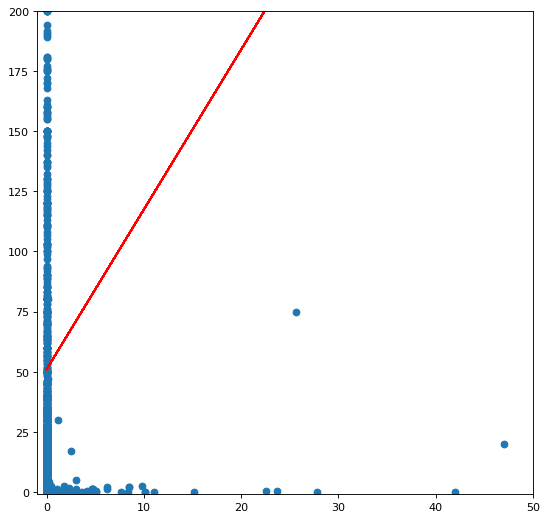

In [0]:
temp=completepandas_df[completepandas_df.type=='SNOW']
temp=temp.dropna()
temp=temp.groupby(by=['LATITUDE','LONGITUDE','date']).mean().reset_index()
finalFinal = pd.merge(temp, fire, on=['LATITUDE','LONGITUDE','date'], how='inner')
X = finalFinal[['value']].values.reshape(-1,1)
Y = finalFinal[['FIRE_SIZE']].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
regressor = LinearRegression().fit(X_train,Y_train)
pred = regressor.predict(X_test)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_test, Y_test)
plt.xlim(-1, 50)
plt.ylim(-1, 200)
plt.plot(X_test, pred, color='red')
plt.show()